# Logistic Regression with a Single Neuron
In this notebook, we implement **Logistic Regression** using a custom-built **SingleNeuron** class.

Logistic regression is a classification algorithm used to predict the **probability** that a given input belongs to a specific class.
Instead of producing continuous values like linear regression, it produces a value between 0 and 1 by passing the result of a linear equation through the **sigmoid function**:
$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$

This value can be interpreted as a probability, and we assign class labels (0 or 1) based on a threshold (commonly 0.5).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

##  Load and Preprocess the Penguins Dataset
We will use the `palmerpenguins` dataset, but restrict it to only **two classes** (`Adelie` and `Gentoo`) to make it suitable for binary classification.

We'll also drop any rows with missing values and map the target species to binary labels: Adelie → 0, Gentoo → 1.

In [2]:
penguins_df = pd.read_csv("penguins.csv")
penguins_df = penguins_df.dropna()
penguins_df = penguins_df[penguins_df['species'].isin(['Adelie', 'Gentoo'])].copy()
penguins_df['label'] = penguins_df['species'].map({'Adelie': 0, 'Gentoo': 1})
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,label
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,0


## Explore the Data
We'll take a quick look at how the features differ between the two species using a pairplot.

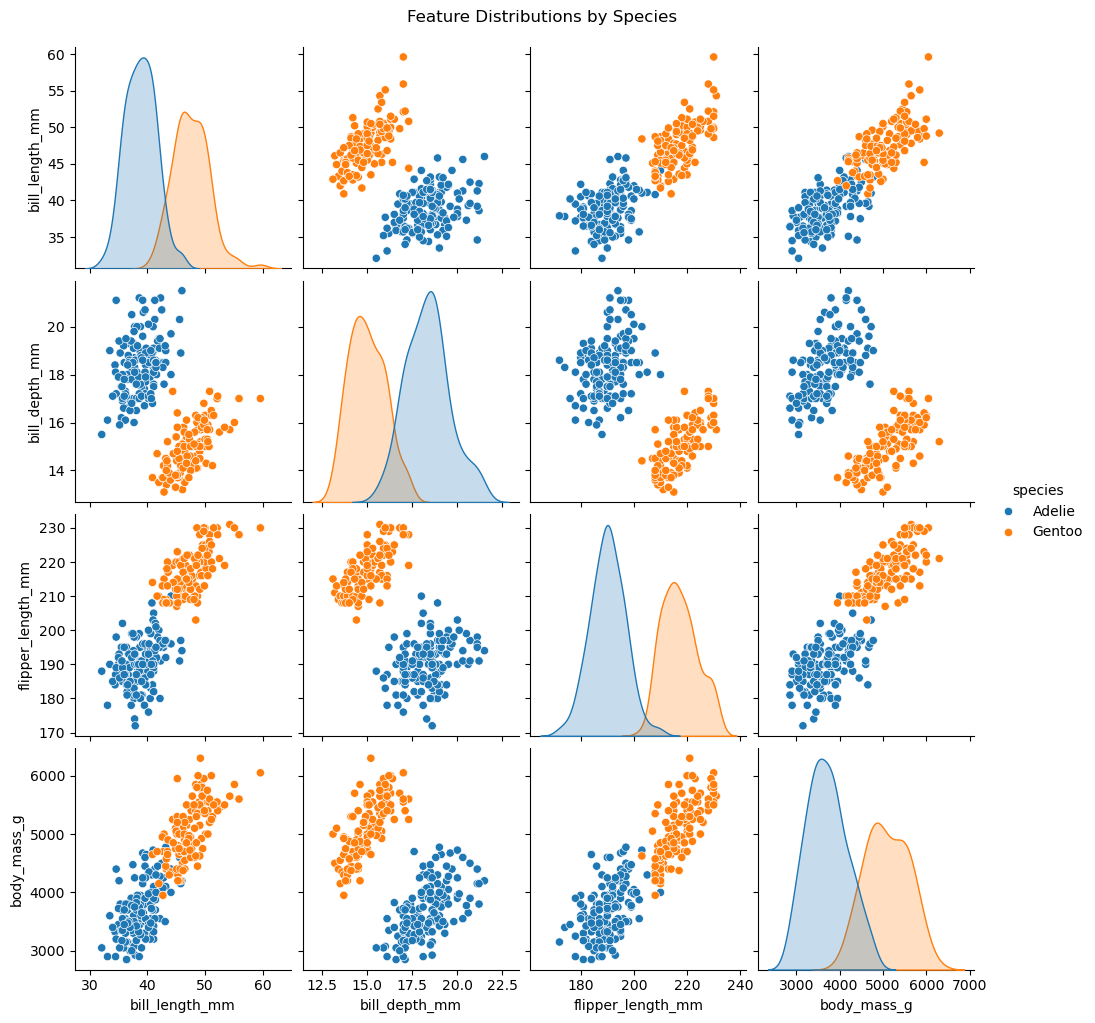

In [3]:
sns.pairplot(penguins_df, hue='species', vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'])
plt.suptitle('Feature Distributions by Species', y=1.02)
plt.show()

## Normalize and Prepare Features
Logistic regression works best when the input features are on a similar scale. We'll normalize the features to have mean 0 and standard deviation 1.

In [4]:
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = penguins_df[features].values
y = penguins_df['label'].values
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_norm = (X - X_mean) / X_std

## Define Sigmoid Function and Cross-Entropy Loss
The **sigmoid function** squashes input values between 0 and 1, making it perfect for binary classification.

The **cross-entropy loss** function measures how far off a prediction is from the true label. It's commonly used for classification tasks.

In [8]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def cross_entropy(y_hat, y):
    return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)

## Build and Train the SingleNeuron Class
We now use a single neuron with sigmoid activation and cross-entropy loss to learn the classification boundary.

In [9]:
class SingleNeuron(object):
    def __init__(self, activation_function, cost_function):
        self.activation_function = activation_function
        self.cost_function = cost_function

    def train(self, X, y, alpha=0.005, epochs=50):
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                error = (self.predict(xi) - target)
                self.w_[:-1] -= alpha * error * xi
                self.w_[-1] -= alpha * error
                errors += self.cost_function(self.predict(xi), target)
            self.errors_.append(errors / N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)

## Train the Model

In [10]:
neuron = SingleNeuron(sigmoid, cross_entropy)
neuron.train(X_norm, y, alpha=0.01, epochs=100)
probs = np.array([neuron.predict(xi) for xi in X_norm])
preds = (probs >= 0.5).astype(int)

## Plot Training Loss Over Time

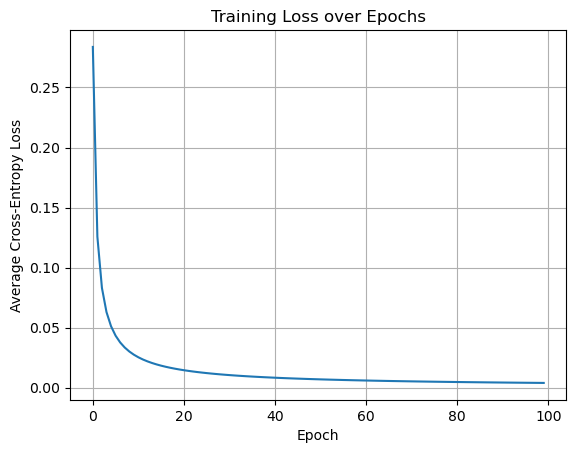

In [11]:
plt.plot(neuron.errors_)
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Average Cross-Entropy Loss')
plt.grid(True)
plt.show()

## Evaluate Model Performance

Accuracy: 1.00


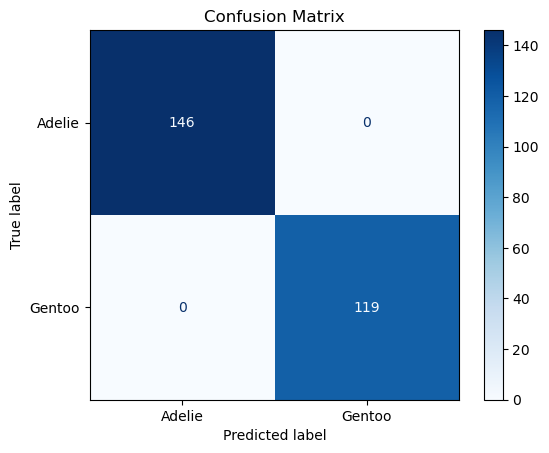

In [12]:
acc = accuracy_score(y, preds)
print(f"Accuracy: {acc:.2f}")
cm = confusion_matrix(y, preds)
disp = ConfusionMatrixDisplay(cm, display_labels=['Adelie', 'Gentoo'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

## ✅ Conclusion
- Logistic Regression is a powerful yet interpretable model for binary classification.
- The model converged well and made accurate predictions distinguishing Adelie and Gentoo penguins.
- We trained it from scratch using gradient descent and monitored its learning using cross-entropy loss.